<a href="https://colab.research.google.com/github/SUBASINIKARIAN/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data_train=pd.read_csv('/content/confirmedraw.csv')

In [ ]:
data_train.head(5)

,Unnamed: 0,Estado,Sexo,Edad,Fecha de Inicio de síntomas
0,0,MÉXICO,FEMENINO,75,28/03/2020
1,1,TAMAULIPAS,MASCULINO,22,04/04/2020
2,2,CIUDAD DE MÉXICO,MASCULINO,40,17/03/2020
3,3,CIUDAD DE MÉXICO,FEMENINO,29,26/03/2020
4,4,YUCATÁN,MASCULINO,71,12/04/2020


In [ ]:
x=data_train.shape
x

(7497, 5)

In [ ]:
data_train.columns

Index(['Unnamed: 0', 'Estado', 'Sexo', 'Edad', 'Fecha de Inicio de síntomas'], dtype='object')

In [ ]:
data_train.duplicated().sum()

0

In [ ]:
data_train.isnull().sum()

Unnamed: 0                     0
Estado                         0
Sexo                           0
Edad                           0
Fecha de Inicio de síntomas    0
dtype: int64

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   7497 non-null   int64 
 1   Estado                       7497 non-null   object
 2   Sexo                         7497 non-null   object
 3   Edad                         7497 non-null   int64 
 4   Fecha de Inicio de síntomas  7497 non-null   object
dtypes: int64(2), object(3)
memory usage: 293.0+ KB


In [ ]:
data_train.describe()

,Unnamed: 0,Edad
count,7497.000000,7497.000000
mean,3748.000000,46.269041
std,2164.341817,15.731761
min,0.000000,0.000000
25%,1874.000000,34.000000
50%,3748.000000,46.000000
75%,5622.000000,57.000000
max,7496.000000,97.000000


In [ ]:
data_train.drop(['Unnamed: 0'],axis=1)

,Estado,Sexo,Edad,Fecha de Inicio de síntomas
0,MÉXICO,FEMENINO,75,28/03/2020
1,TAMAULIPAS,MASCULINO,22,04/04/2020
2,CIUDAD DE MÉXICO,MASCULINO,40,17/03/2020
3,CIUDAD DE MÉXICO,FEMENINO,29,26/03/2020
4,YUCATÁN,MASCULINO,71,12/04/2020
...,...,...,...,...
7492,BAJA CALIFORNIA,FEMENINO,53,06/04/2020
7493,COAHUILA,MASCULINO,60,10/04/2020
7494,SONORA,MASCULINO,63,05/04/2020
7495,CHIHUAHUA,FEMENINO,43,29/03/2020


In [ ]:
data_train.nunique()

Unnamed: 0                     7497
Estado                           32
Sexo                              2
Edad                             98
Fecha de Inicio de síntomas      58
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_train['Sexo'].unique()

array(['FEMENINO', 'MASCULINO'], dtype=object)

In [ ]:
data_train['Sexo'].replace(['FEMENINO', 'MASCULINO'],
                        [0, 1], inplace=True)

In [ ]:
data_train['Sexo'].value_counts()

1    4343
0    3154
Name: Sexo, dtype: int64

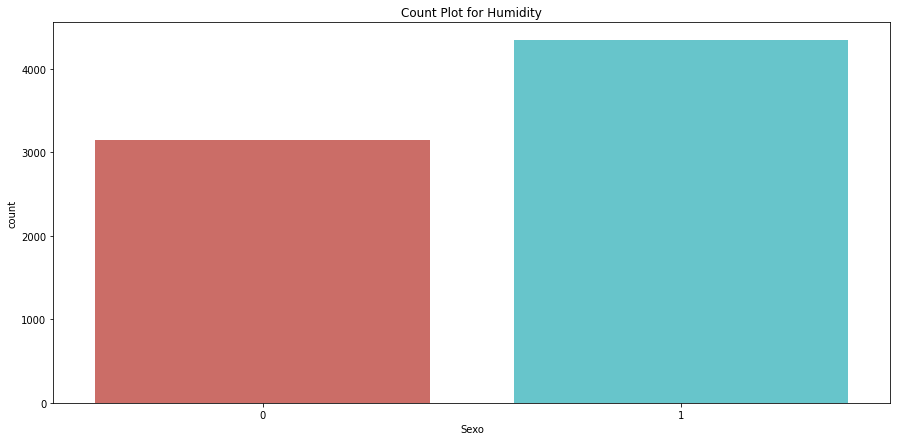

In [ ]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for Humidity')
sns.countplot(x = 'Sexo', data = data_train, palette = 'hls')
plt.show()

In [ ]:
state_data = data_train['Sexo'].value_counts()
state_data


1    4343
0    3154
Name: Sexo, dtype: int64

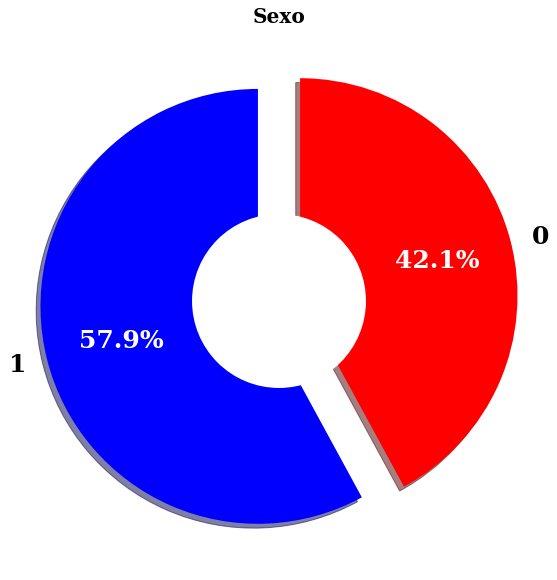

In [ ]:
Sexo_data = data_train['Sexo'].value_counts()
explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(Sexo_data,
 labels = Sexo_data.index,
 colors = ['blue', 'red'],
 pctdistance = 0.65,
 shadow = True,
 startangle = 90,
 explode = explode,
 autopct = '%1.1f%%',
 textprops={ 'fontsize': 25,
 'color': 'black',
'weight': 'bold',
'family': 'serif' })
plt.setp(pcts, color='white')
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sexo', size=20, **hfont)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


In [ ]:
data_train['Edad'].unique()

array([75, 22, 40, 29, 71, 61, 33, 77, 84, 54, 65, 46, 38, 45, 50, 26, 64,
       56, 49, 41, 39, 92, 44, 69, 68, 35, 52, 48, 57, 47, 24, 51, 43, 67,
       58, 76, 34, 55, 59, 62, 73, 30, 37, 72, 28, 63, 42, 27, 60, 36, 86,
       23, 31, 79, 32, 18,  4, 87, 81, 74, 21, 25, 66, 53, 93, 70, 80, 78,
       19, 91, 88, 20, 16, 17, 89,  0, 10,  7, 97, 85,  1, 13, 15, 83, 14,
       82,  2,  6, 11,  5, 12, 90,  9,  3, 96,  8, 94, 95])

In [ ]:
data_train["Estado"] = data_train["Estado"].astype('category')
data_train.dtypes
data_train["Estado"]= data_train["Estado"].cat.codes
data_train.head()

,Unnamed: 0,Estado,Sexo,Edad,Fecha de Inicio de síntomas
0,0,16,0,75,28/03/2020
1,1,27,1,22,04/04/2020
2,2,6,1,40,17/03/2020
3,3,6,0,29,26/03/2020
4,4,30,1,71,12/04/2020


In [ ]:
df2 = data_train.copy()


In [ ]:
df2 = df2.set_index('Unnamed: 0')

In [ ]:
df2.head(5)

,Estado,Sexo,Edad,Fecha de Inicio de síntomas
Unnamed: 0,,,,
0,MÉXICO,0,75,28/03/2020
1,TAMAULIPAS,1,22,04/04/2020
2,CIUDAD DE MÉXICO,1,40,17/03/2020
3,CIUDAD DE MÉXICO,0,29,26/03/2020
4,YUCATÁN,1,71,12/04/2020


In [ ]:
df2.duplicated().sum()

885

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2.isnull().sum()

Estado                         0
Sexo                           0
Edad                           0
Fecha de Inicio de síntomas    0
dtype: int64

In [ ]:
df3 = df2[df2['Sexo'] == 0]
df4 = df2[df2['Sexo'] == 1]

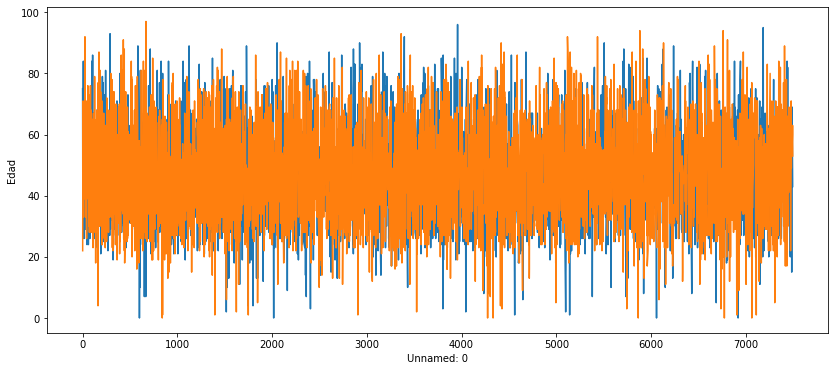

In [ ]:
plt.figure(figsize = (14,6))
sns.lineplot(data=df3['Edad'])
sns.lineplot(data=df4['Edad'])
plt.show()


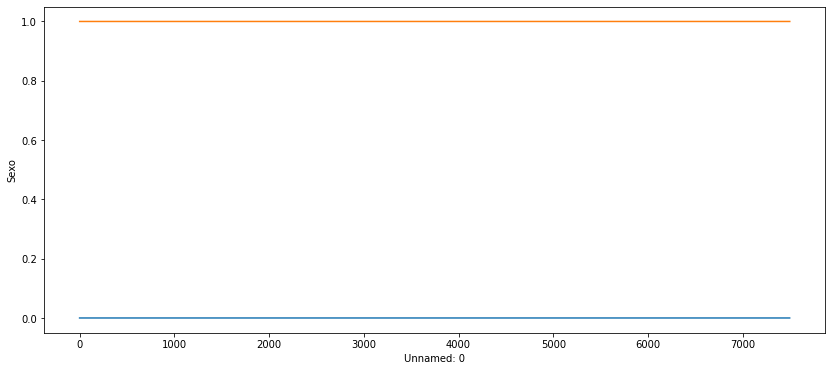

In [ ]:
plt.figure(figsize = (14,6))
sns.lineplot(data=df3['Sexo'])
sns.lineplot(data=df4['Sexo'])
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
y = df2['Sexo']
X= df2.drop(['Sexo','Fecha de Inicio de síntomas'], axis=1)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 0.3,
 random_state = 0)


In [ ]:
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn= knn.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)


In [ ]:
cm_knn

array([[620, 499],
       [570, 571]])

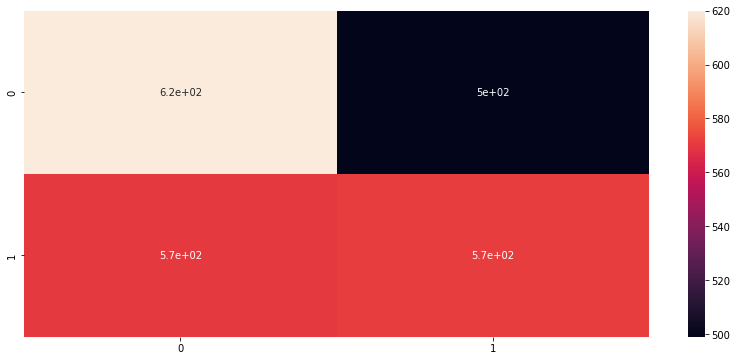

In [ ]:
plt.figure(figsize = (14,6))
sns.heatmap(cm_knn, annot = True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.52      0.55      0.54      1119
           1       0.53      0.50      0.52      1141

    accuracy                           0.53      2260
   macro avg       0.53      0.53      0.53      2260
weighted avg       0.53      0.53      0.53      2260



In [ ]:
print(accuracy_score(y_test, y_pred_knn))


0.5269911504424779


In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
y_pred_lr= lr.predict(X_test)

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)


In [ ]:
cm_lr

array([[619, 500],
       [613, 528]])

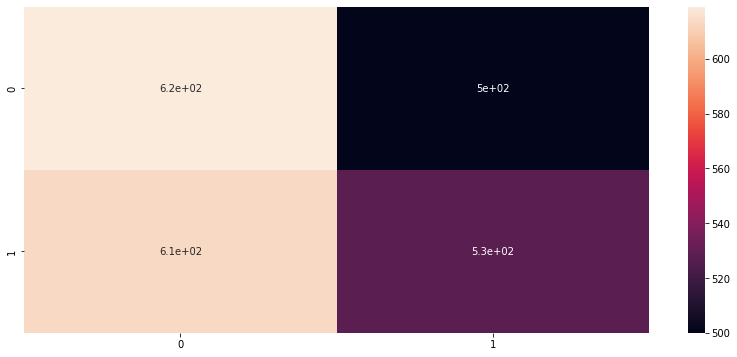

In [ ]:
plt.figure(figsize = (14,6))
sns.heatmap(cm_lr, annot = True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.50      0.55      0.53      1119
           1       0.51      0.46      0.49      1141

    accuracy                           0.51      2260
   macro avg       0.51      0.51      0.51      2260
weighted avg       0.51      0.51      0.51      2260



In [ ]:
print(accuracy_score(y_test, y_pred_lr))


0.5075221238938054


In [ ]:
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred_rf= rf.predict(X_test)


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)


In [ ]:
cm_rf

array([[634, 485],
       [511, 630]])

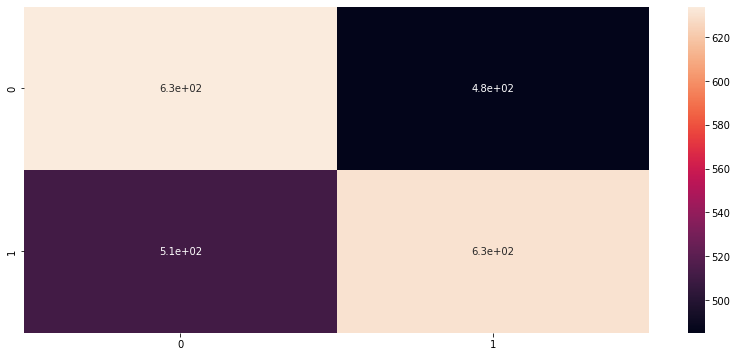

In [ ]:
plt.figure(figsize = (14,6))
sns.heatmap(cm_rf, annot = True)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1119
           1       0.57      0.55      0.56      1141

    accuracy                           0.56      2260
   macro avg       0.56      0.56      0.56      2260
weighted avg       0.56      0.56      0.56      2260



In [ ]:
print(accuracy_score(y_test, y_pred_rf))

0.5592920353982301
